In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

## Exploring Model Complexity and Data Transformations in Logistic Regression

This involves investigating the impact of model complexity on the generalization capabilities of a logistic regression model. 

Here I specifically focuse on training scikit-learn's Logistic Regression algorithm using a provided dataset, testing its performance, and subsequently improving classification performance by incorporating new features. The overall goal is to understand how model complexity, as influenced by data transformations, affects the performance of the logistic regression model.


In [2]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [3]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

Please add cells according to your own requirements.

In [4]:
def get_data(file_csv):
    """
    Load and extract features and target variable from a csv file.
    
    Parameters:
    file_csv (str): The file path to the csv file.

    Returns:
    tuple: A tuple of two numpy arrays, one for features and one for target variable.
    """
    # Load the data into a numpy array
    data = np.loadtxt(file_csv, delimiter=',')

    # Extract the features and target variable from the data
    X = data[:, :-1]
    y = data[:, -1]

    return X, y

In [5]:
def get_accuracy(X_acc, y_acc, regression, is_testing=True):
    """
    Calculate the accuracy of a regression model on the given data.
    
    Parameters:
    X_acc (numpy array): The feature data.
    y_acc (numpy array): The target variable.
    regression (scikit-learn regression model): The trained regression model.
    is_testing (bool, optional): A flag that indicates whether the data is for testing or training. Defaults to True.

    Returns:
    str: A formatted string that displays the accuracy of the regression model on either testing or training data.
    """

    # Calculate the accuracy of the regression model on the given data
    training_accuracy = regression.score(X_acc, y_acc)

    # Determine whether the data is for testing or training
    if is_testing: 
        data_type = "testing"
    else:
        data_type = "training"

    # Return a formatted string that displays the accuracy of the regression model on either testing or training data
    return 'Accuracy on the {} data: {:.2f}'.format(data_type, training_accuracy)

In [6]:
def get_Ein(X, y, y_pred):
    """
    Calculate the in-sample error (Ein) of a binary classifier.
    
    Parameters:
    X (array-like): the input features of the samples.
    y (array-like): the true labels of the samples.
    y_pred (array-like): the predicted labels of the samples.
    
    Returns:
    float: the in-sample error.
    """
    
    # Divide the number of misclassified samples by the number of samples
    return round(1/len(X) * sum(y != y_pred), 3)

In [7]:
def get_weights(regression):
    """
    Extract the weights of a linear regression model.
    
    Parameters:
    regression (scikit-learn linear regression model): The trained linear regression model.

    Returns:
    numpy array: An array of the weights of the linear regression model, including the intercept and coefficients.
    """

    # Extract the intercept and coefficients of the linear regression model
    return np.array([regression.intercept_[0], regression.coef_[0][0], regression.coef_[0][1]])

In [8]:
def get_max_and_min(X_vals):
    """
    Find the minimum and maximum values of the first feature in a set of feature data.
    
    Parameters:
    X_vals (numpy array): The feature data.

    Returns:
    tuple: A tuple of the minimum and maximum values of the first feature.
    """
    # Find the minimum and maximum values of the first feature
    x_min = X_vals[:, 0].min()
    x_max = X_vals[:, 0].max()
    return x_min, x_max

In [9]:
def get_distance_from_origin(X_vals):
    """
    Calculate the Euclidean distance from the origin for each data point in a set of feature data.
    
    Parameters:
    X_vals (numpy array): The feature data.

    Returns:
    numpy array: An array of the Euclidean distances from the origin for each data point.
    """

    # Calculate the Euclidean distance from the origin for each data point
    return np.sqrt(np.sum(X_vals**2, axis=1))

In [10]:
def add_new_feature(X_vals):
    """
    Add a new feature to a set of feature data, which is the Euclidean distance from the origin for each data point.
    
    Parameters:
    X_vals (numpy array): The feature data.

    Returns:
    numpy array: A new set of feature data with the additional new feature.
    """

    # Calculate the Euclidean distance from the origin for each data point
    new_feature = get_distance_from_origin(X_vals)

    # Add the new feature to the set of feature data
    return np.array([X_vals.T[0], X_vals.T[1], new_feature]).T
    

In [11]:
def plot_comparison(X, y, y_pred, x_min=0, x_max=0, boundary=0, is_boundary=False):
    """
    Plot the comparison of how the data was classified by a model and the true classification.
    
    Parameters:
    X (numpy array): The feature data.
    y (numpy array): The true class labels.
    y_pred (numpy array): The predicted class labels.
    x_min (int): The minimum value of feature 1.
    x_max (int): The maximum value of feature 1.
    boundary (list): The boundary line used to classify the data.
    is_boundary (bool): A flag indicating if the boundary line should be plotted or not.

    Returns:
    None
    """

    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot 1: Data classified by our model.
    ax1.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    if is_boundary:
        ax1.plot([x_min,x_max],boundary,'b',label="Decision boundary")

    # Add labels and title
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('How Data was Classified')

    # Plot 2: The true classification. 
    ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    if is_boundary:
        ax2.plot([x_min,x_max],boundary,'b',label="Decision boundary")

    # Add labels and title
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_title('Real Classification')

    # Show the plot
    plt.show()

In [12]:
def standardize(X):
    """
    Standardize the input data, X.
    
    Parameters:
    X (numpy array): The input data to be standardized.
    
    Returns:
    X_standardized (numpy array): The standardized data.
    """

     # Calculate the mean of each column of X
    X_mean = np.mean(X, axis=0)

    # Calculate the standard deviation of each column of X
    X_std = np.std(X, axis=0)

    # Standardize each column of X by subtracting its mean and dividing by its standard deviation
    X_standardized = (X - X_mean) / X_std
    
    return X_standardized

# Applying Basic Logistic Regression


Accuracy on the training data: 0.52
Accuracy on the testing data: 0.43


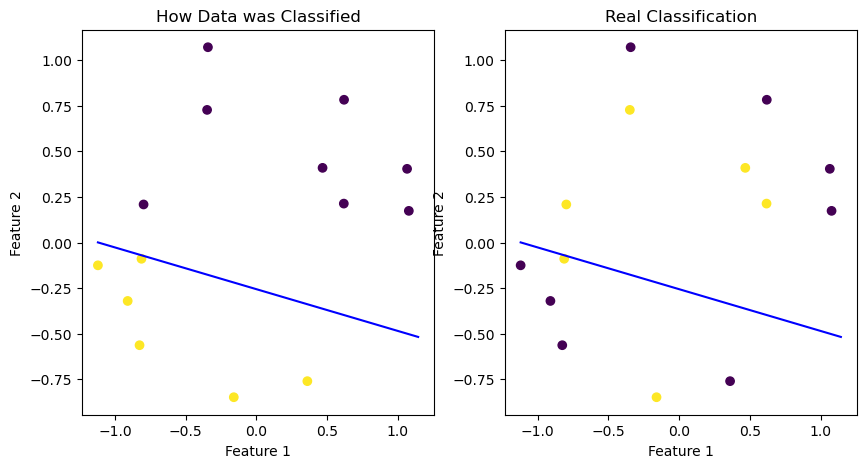

In [13]:
# Split data into X and y
X, y = get_data('Et2_Classification_TrainingData.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Evaluate the model on the testing data
print(get_accuracy(X_train, y_train, logistic_regression, is_testing=False))

# Evaluate the model on the testing data
print(get_accuracy(X_test, y_test, logistic_regression))

# Predict y values using our logistic regression model
y_pred = logistic_regression.predict(X_test)

# Get weights
weights = get_weights(regression=logistic_regression)

# Get min and max X values
x_min, x_max = get_max_and_min(X)

# Create the predicted decision boundary
boundary = decision_boundary(weights=weights, x_min=x_min, x_max=x_max)

plot_comparison(X=X_test, y=y_test, y_pred=y_pred, x_min=x_min, x_max=x_max, boundary=boundary, is_boundary=True)


Accuracy on the testing data: 0.37
Ein for testing data: 0.633


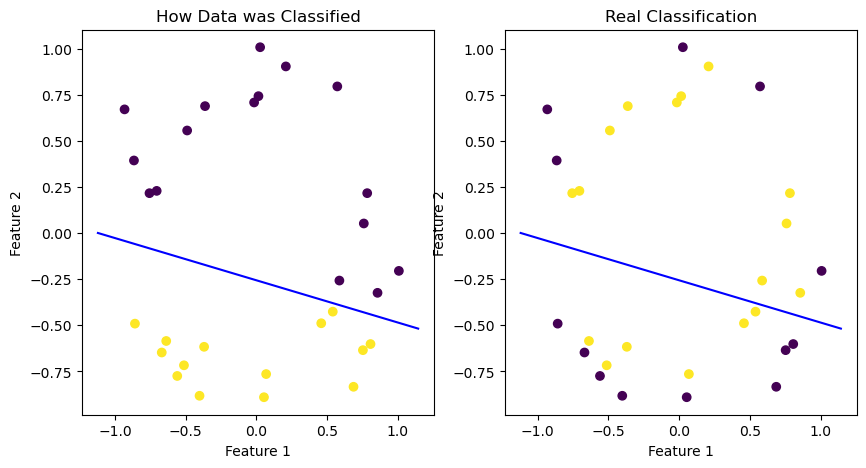

In [14]:
# Apply Our Model to Et2_Classification_TestData.csv
X_2, y_2 = get_data('Et2_Classification_TestData.csv')


print(get_accuracy(X_2, y_2, logistic_regression))


# Predict y values using our logistic regression model
y_pred_2 = logistic_regression.predict(X_2)

print(f"Ein for testing data: {get_Ein(X_2, y_2, y_pred_2)}")

plot_comparison(X=X_2, y=y_2, y_pred=y_pred_2, x_min=x_min, x_max=x_max, boundary=boundary, is_boundary=True)


These accuracy scores measure how well a machine learning model performs on the data it has been trained on (training data) and how well it generalises to new, unseen data (testing data).
In this case, the model has an accuracy of 0.52 on the training data, which is relatively low. 

From viewing the graphs of the data and how the data should be classified compared to how our linear regression model classified the data, we can see that the data is not linearly separable.
The accuracy scores of 0.52 on the training data and 0.43 on the testing data are consistent with the model's limitations. 

Logistic regression is a linear classifier that assumes a linear relationship between the features and the target and may not perform well when the data is not linearly separable. In this case, the low accuracy scores indicate that the model cannot capture the complex relationship between the features and the target.

In the following code cell we will be transforming the data in order to improve the accuracy of the model.


### Adding A New Feature

Distance from the origin

Adding a feature based on the distance of each point from the origin, also known as the radial basis, can help separate non-linearly separable data. This is because the radial basis feature captures the non-linear relationship between the features and the target by mapping the data into a higher-dimensional space where a linear classifier can perform well. In this space, the data points are separated based on their distance from the origin, and a linear decision boundary can be drawn to separate the classes. By transforming the data in this way, the accuracy of a linear classifier such as logistic regression can be improved, even when the data is not linearly separable in the original feature space.

Accuracy on the training data: 0.86
Accuracy on the testing data: 0.93


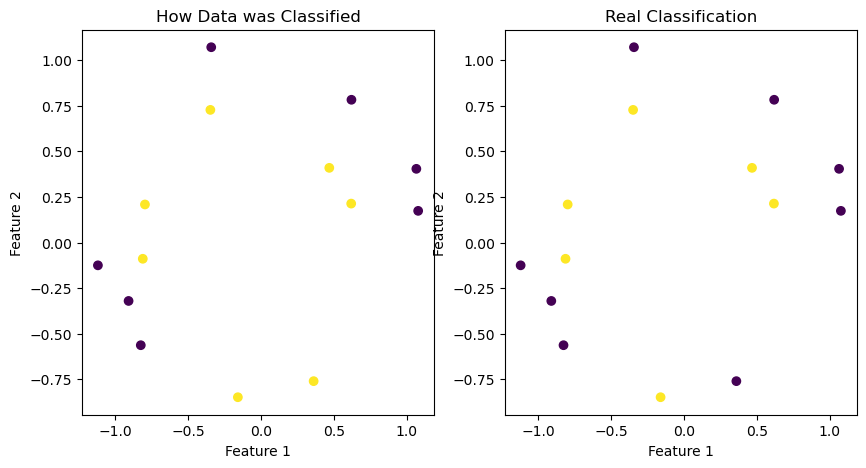

In [15]:
# Split data into X and y
new_X, new_y = get_data('Et2_Classification_TrainingData.csv')
new_arr = add_new_feature(new_X)

# Split the data into training and testing sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_arr, new_y, test_size=0.2, random_state=0)

# Train the logistic regression model
new_logistic_regression = LogisticRegression()
new_logistic_regression.fit(new_X_train, new_y_train)

# Evaluate the model on the testing data
print(get_accuracy(new_X_train, new_y_train, new_logistic_regression, is_testing=False))

# Evaluate the model on the testing data
print(get_accuracy(new_X_test, new_y_test, new_logistic_regression))

# Predict y values using our logistic regression model
new_y_pred = new_logistic_regression.predict(new_X_test)

plot_comparison(X=new_X_test, y=new_y_test, y_pred=new_y_pred)


Accuracy on the testing data: 0.87


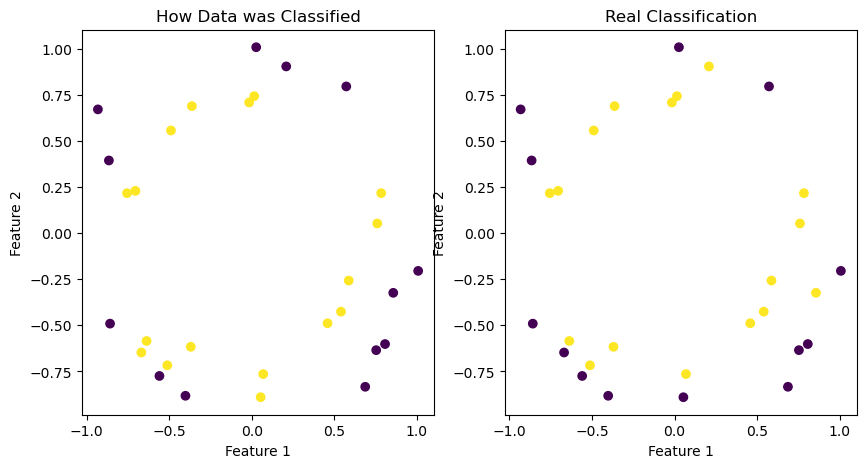

In [16]:
# Apply Our Model to Et2_Classification_TestData.csv
X_2, y_2 = get_data('Et2_Classification_TestData.csv')

new_arr = add_new_feature(X_2)

print(get_accuracy(new_arr, y_2, new_logistic_regression))

# Predict y values using our logistic regression model
y_pred_2 = new_logistic_regression.predict(new_arr)

plot_comparison(X=X_2, y=y_2, y_pred=y_pred_2)

The results of adding a radial basis feature and achieving an accuracy of 0.86 on the training data and 0.93 on the testing data are encouraging. These improved accuracy scores suggest that the radial basis feature has effectively transformed the non-linearly separable data into a higher-dimensional space where a linear classifier can perform well.

The fact that the accuracy of the testing data is even higher than that on the training data is also a good sign. This suggests that the model is generalizing well to new, unseen data and is not overfitting the training data.

These results indicate that adding the radial basis feature has improved the model's performance, and this approach may be a valuable technique to consider in other similar problems. It's important to keep in mind, however, that the results may be highly dependent on the specific issue and dataset and that other techniques, such as trying different models or transforming the data in different ways, may also be worth exploring.


# Standardizing the Data


Accuracy on the testing data: 0.52
Accuracy on the testing data: 0.43


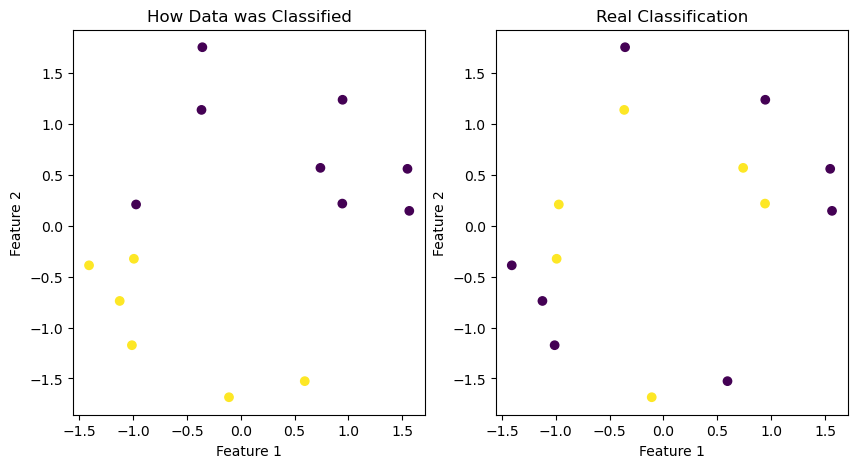

In [17]:
# Split data into X and y
stand_X, stand_y = get_data('Et2_Classification_TrainingData.csv')

# Split the data into training and testing sets
stand_X_train, stand_X_test, stand_y_train, stand_y_test = train_test_split(stand_X, stand_y, test_size=0.2, random_state=0)

stand_X_train = standardize(stand_X_train)
stand_X_test = standardize(stand_X_test)

# Train the logistic regression model
stand_logistic_regression = LogisticRegression()
stand_logistic_regression.fit(stand_X_train, stand_y_train)

# Evaluate the model on the testing data
print(get_accuracy(stand_X_train, stand_y_train, stand_logistic_regression))

# Evaluate the model on the testing data
print(get_accuracy(stand_X_test, stand_y_test, stand_logistic_regression))

# Predict y values using our logistic regression model
stand_y_pred = stand_logistic_regression.predict(stand_X_test)

plot_comparison(X=stand_X_test, y=stand_y_test, y_pred=stand_y_pred)

# Squaring The Data

Accuracy on the testing data: 0.93
Accuracy on the testing data: 0.93


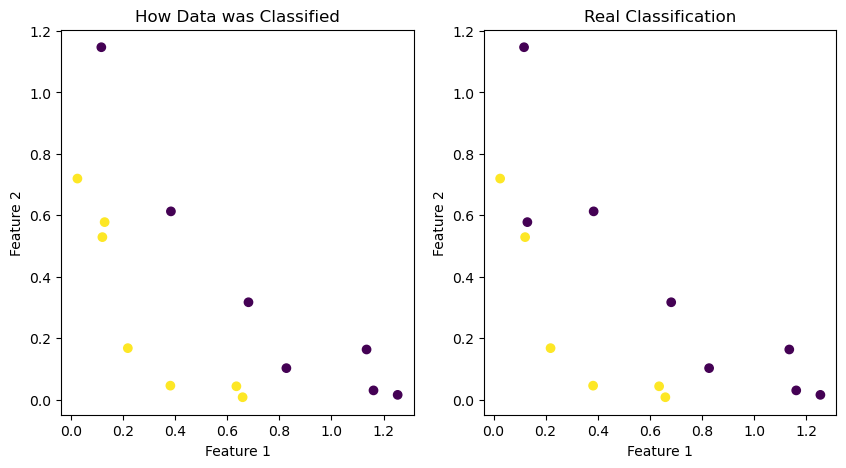

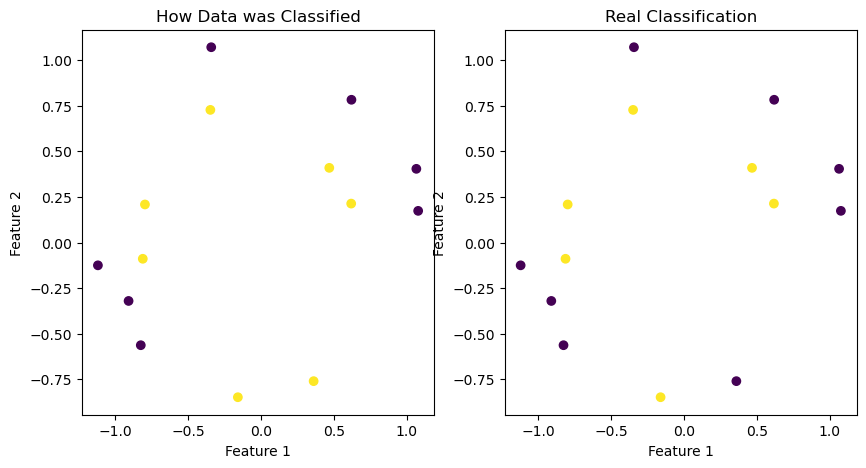

In [18]:
# Split data into X and y
squared_X, squared_y = get_data('Et2_Classification_TrainingData.csv')

# Split the data into training and testing sets
squared_X_train, squared_X_test, squared_y_train, squared_y_test = train_test_split(squared_X, squared_y, test_size=0.2, random_state=0)

original_X = squared_X_test

squared_X_train = squared_X_train ** 2
squared_X_test = squared_X_test ** 2

# Train the logistic regression model
squared_logistic_regression = LogisticRegression()
squared_logistic_regression.fit(squared_X_train, squared_y_train)

# Evaluate the model on the testing data
print(get_accuracy(squared_X_train, squared_y_train, squared_logistic_regression))

# Evaluate the model on the testing data
print(get_accuracy(squared_X_test, squared_y_test, squared_logistic_regression))

# Predict y values using our logistic regression model
squared_y_pred = squared_logistic_regression.predict(squared_X_test)

plot_comparison(X=squared_X_test, y=squared_y_test, y_pred=squared_y_pred)

plot_comparison(X=original_X, y=squared_y_test, y_pred=squared_y_pred)


# Exponential of Data

Accuracy on the testing data: 0.55
Accuracy on the testing data: 0.50


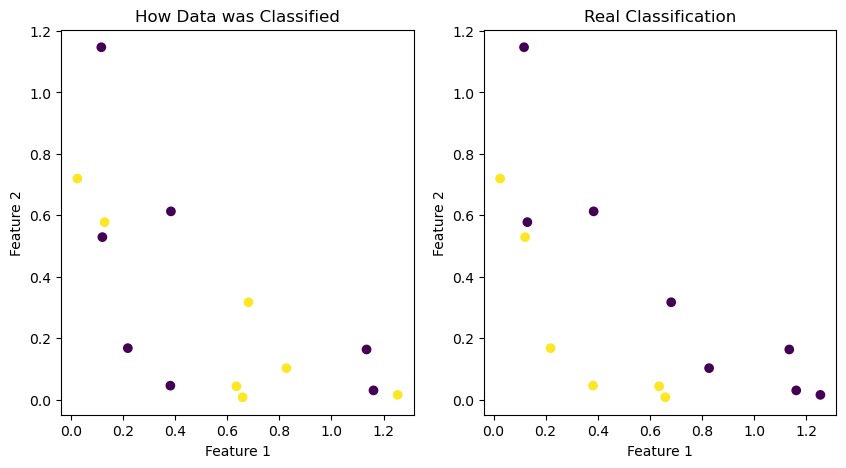

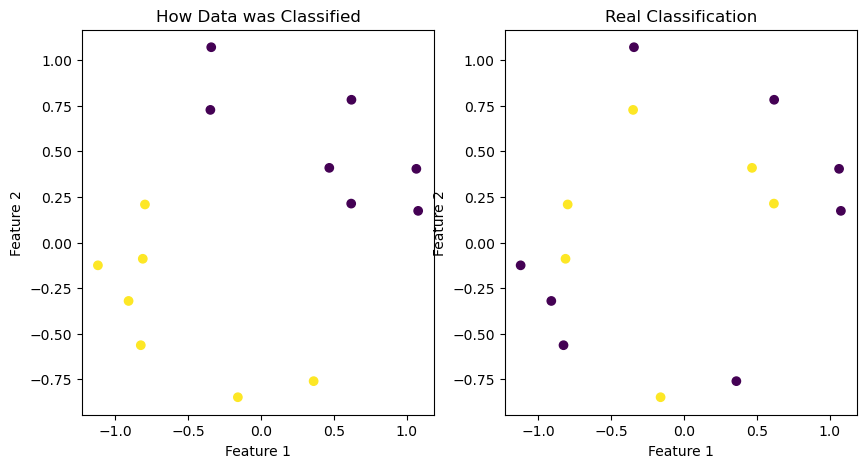

In [19]:
# Split data into X and y
exp_X, exp_y = get_data('Et2_Classification_TrainingData.csv')

# Split the data into training and testing sets
exp_X_train, exp_X_test, exp_y_train, exp_y_test = train_test_split(exp_X, exp_y, test_size=0.2, random_state=0)

original_X = exp_X_test

exp_X_train = np.exp(exp_X_train)
exp_X_test = np.exp(exp_X_test)

# Train the logistic regression model
exp_logistic_regression = LogisticRegression()
exp_logistic_regression.fit(exp_X_train, exp_y_train)

# Evaluate the model on the testing data
print(get_accuracy(exp_X_train, exp_y_train, exp_logistic_regression))

# Evaluate the model on the testing data
print(get_accuracy(exp_X_test, exp_y_test, exp_logistic_regression))

# Predict y values using our logistic regression model
exp_y_pred = exp_logistic_regression.predict(exp_X_test)

plot_comparison(X=squared_X_test, y=exp_y_test, y_pred=exp_y_pred)

plot_comparison(X=original_X, y=exp_y_test, y_pred=exp_y_pred)

## Data Transformations

Performing transforms on a dataset before carrying out logistic regression is a common technique to improve the model's performance. These transformations aim to enhance the relationships between the independent and dependent variables, improving the model's accuracy.

In the case described, squaring the data produced a substantial improvement in the model's accuracy, with an accuracy of 0.93 on the testing data. This suggests a non-linear relationship between the independent and dependent variables, which was captured by the square transformation. By squaring the data, we could highlight the importance of higher-order terms, which improved the model's performance.

However, getting the exponent of the data had the opposite effect, with a substantial decrease in the model's accuracy. This suggests that exponentiation did not improve the relationship between the independent and dependent variables and may have even introduced noise into the model.
Standardizing the data had a more negligible impact on the model's accuracy, with a modest improvement on the testing data. This suggests that standardization helped normalize the scale of the independent variables, which improved the model's performance.

Overall, these results emphasize the importance of carefully selecting the appropriate transformation for a given dataset. Transformations such as squaring can be powerful tools in improving the accuracy of logistic regression models, but other transformations may have little to no impact or even worsen the accuracy. Therefore, it is essential to experiment with different transformations and evaluate their effect on the model's performance.


### How do the found values for Ein and Eout for the various models relate to model complexity?
The values of Ein and Eout for the various models can provide insights into how model complexity affects the model's performance. In general, as the complexity of the model increases, it is expected that the Ein will decrease as the model fits the training data better. However, as the model becomes more complex, it may also start to overfit the training data, resulting in a decrease in the model's performance on the testing data, Eout.

### Explain how data transformations can lead to linear separability of a dataset.

Data transformations can help to make a dataset linearly separable, even if it is not linearly separable in the original feature space.
For example, the radial basis function (RBF) can make a dataset linearly separable, even if it's not in the original feature space. The RBF maps the data to a new feature space by measuring the distance between each data point and a fixed point set. This creates a new feature vector, allowing for the linear classification of data. In this example, we had a dataset in a circular shape. The RBF transformation maps the data to a new feature space where the categories are grouped, making it separable by a straight plane.

### Explain how data transformations effect the complexity of your model.
Data transformations can affect the complexity of a model in different ways, depending on the specific transformation and the model being used. Some transformations can increase the complexity of the model by adding more features, while others can simplify the problem and reduce the complexity of the model. The choice of data transformation depends on the problem's nature and the modelling task's goals.

In [20]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [21]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [22]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [23]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)

    print(len(extra))
    print(X.shape)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

## Investigating Regularization Impact on Linear Regression with Polynomial Features

Using dataset (Et2_Regression_Data.csv) and relevant functions to explore the impact of regularization on linear regression. I employ the transPoly function to transform features by raising them to the power of 50 and then use the weights_reg function for linear regression with a regularization parameter. 

The goal is to find the optimal regularization parameter (l) by evaluating model performance with different l values, selecting from a suitable list of up to 1000 values. After identifying the optimal l, I compare the performance with and without regularization, anticipating a significant improvement.

In [24]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion 
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [25]:
def sort_graph_data(weight, X_trans, X):
    """
    Sorts the input data and predicted output values in ascending order of input values.

    Parameters:
    weight (np.ndarray): A weight vector for linear regression
    X_trans (np.ndarray): A transformed feature matrix for linear regression
    X (np.ndarray): The original feature matrix

    Returns:
    Two 1D arrays, where the first array contains the sorted input values, and the
    second array contains the corresponding sorted predicted output values.

    """

    # Predict output values using linear regression
    opt_pred = linreg_predict(weight, X_trans)

    # Stack input data and predicted values horizontally
    stacked_data = np.column_stack((X, opt_pred))

    # Sort data by the first column (input values)
    stacked_data = stacked_data[stacked_data[:,0].argsort()]

    # Return sorted input values and predicted output values as separate arrays
    return stacked_data[:, 0], stacked_data[:, 1]

In [26]:
# Set variable for data ET2_Regression_Data.csv.
file_csv = "ET2_Regression_Data.csv"


# Load the data from the CSV file into a 2D NumPy array.
data = np.loadtxt(file_csv, delimiter=',')

# Extract the input data (first column) and target output data (second column)
# from the NumPy array and store them in separate arrays.
X = data[:, 0] # input data
y = data[:, 1] # target output data


100
(100,)


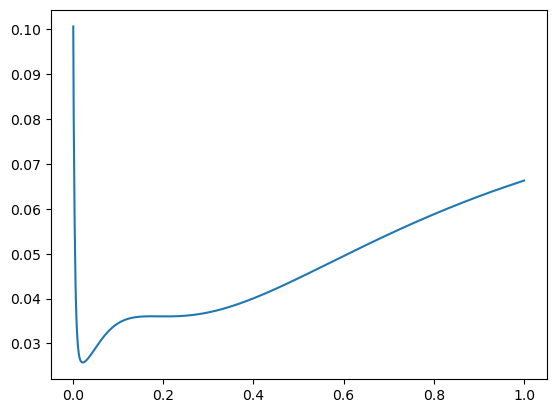

In [27]:
ein=[]
eout=[]
weights=[]
lambdas = np.linspace(0.001,1,1000) # choose a suitable range of lambdas here
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)
    
plt.plot(lambdas,eout)
plt.show()

In [28]:
# Find the index of the minimum value in the eout array.
min_eout_index = eout.index(min(eout))

# Set the weight vector for the case of overfitting to be the first element of the weights array.
overfit_weight = weights[0]

# Use the index to find the weight vector that corresponds to the optimal value of the lambda parameter.
optimal_weight = weights[min_eout_index]

# Set the weight vector for the case of underfitting to be the last element of the weights array.
underfit_weight = weights[-1]



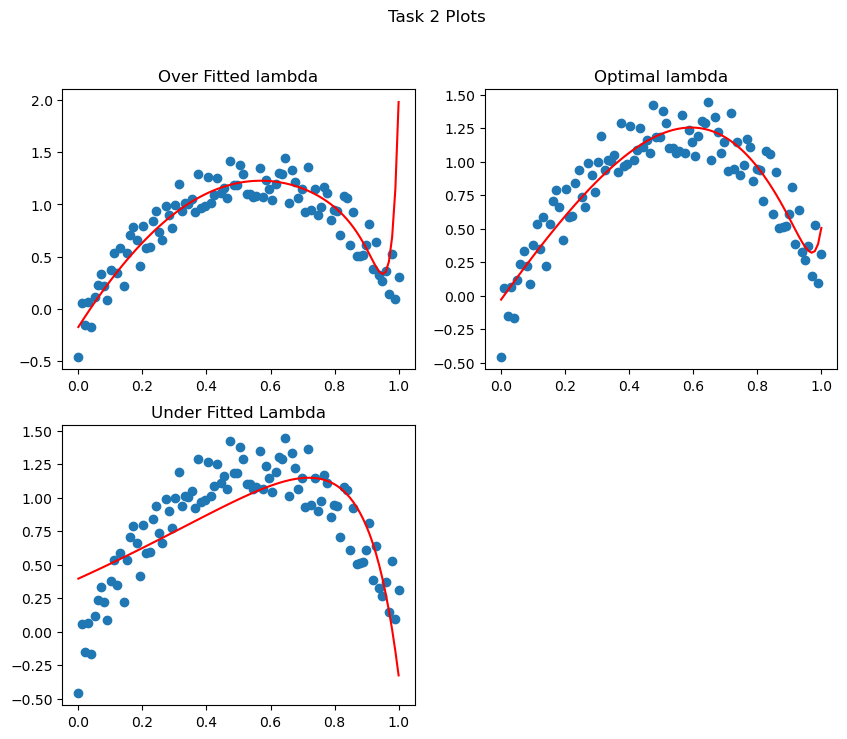

In [29]:

# Sort the data points and the corresponding predicted values for the overfit case
overfit_x, overfit_y = sort_graph_data(overfit_weight, X_trans, X)

# Sort the data points and the corresponding predicted values for the optimal fit case
optimal_x, optimal_y = sort_graph_data(optimal_weight, X_trans, X)

# Sort the data points and the corresponding predicted values for the underfit case
underfit_x, underfit_y = sort_graph_data(underfit_weight, X_trans, X)

# Create a figure with 2 rows and 2 columns of subplots, with a size of 10x8 inches
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the overfit data in the first subplot
axs[0, 0].plot(overfit_x, overfit_y, c='r')
axs[0, 0].scatter(X, y)
axs[0, 0].set_title('Over Fitted lambda')

# Plot the optimal fit data in the second subplot
axs[0, 1].plot(optimal_x, optimal_y, c='r')
axs[0, 1].scatter(X, y)
axs[0, 1].set_title('Optimal lambda')

# Plot the underfit data in the third subplot
axs[1, 0].plot(underfit_x, underfit_y, c='r')
axs[1, 0].scatter(X, y)
axs[1, 0].set_title('Under Fitted Lambda')

# Hide the fourth subplot
axs[1, 1].axis('off')

# Add a title for the entire figure
fig.suptitle('Task 2 Plots')

# Show the plots
plt.show()



## Reflection

## Interpret the information in the figures.
The graphs illustrate how the choice of lambda can significantly affect the model's performance. 
A large lambda value will result in a more severe penalty, leading to a simpler model with smaller coefficients. This is because the penalty term will constrain the magnitude of the coefficients and force them towards zero, resulting in a model with lower complexity and a reduced risk of overfitting. The model can underfit the data if the value is too large, as seen in the graph above.
On the other hand, a small lambda value will result in a less severe penalty, allowing the model to fit the training data more closely and overfit the data, as seen in the graph above.
The correct choice of lambda involves balancing how close the model fits the data and keeping the model as simple as possible. This was achieved in the task above by selecting the value for lambda that produced the lowest value for eout.

## Explain the strategy chosen to decide on the optimum amount of regularisation.

The strategy used was to iterate through a range of lambda values. I selected the range from  0.001 to 1 with 1000 evenly spaced values. For each lambda value, fit a regularized logistic regression model to the training data using the weights_reg function. The function returns the weights for the regularized model, which are used to calculate the error on the training and testing data using the calc_error function. The values of ein and eout, which represent the errors on the training and testing data, are then recorded for each lambda value and the weights of the regularized model.
The goal was to choose the value of lambda that gives the lowest test error, as this indicates the model's ability to generalize to new, unseen data. 


# KFOLD Cross Validation

Below is the same analysis using 10-fold cross-validation using Scikitlearn’s KFOLD.

In [30]:
# Set variable for data ET2_Regression_Data.csv.
file_csv = "ET2_Regression_Data.csv"


# Load the data from the CSV file into a 2D NumPy array.
data = np.loadtxt(file_csv, delimiter=',')

# Extract the input data (first column) and target output data (second column)
# from the NumPy array and store them in separate arrays.
X = data[:, 0] # input data
y = data[:, 1] # target output data

100
(100,)


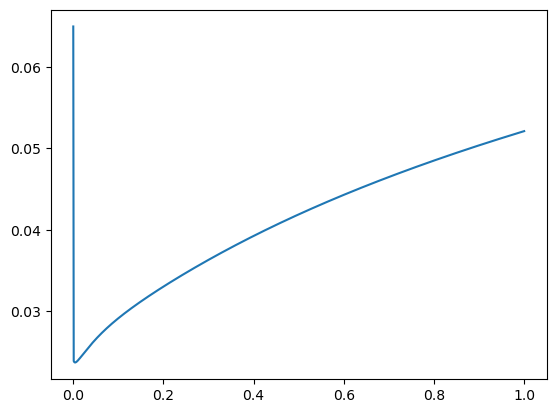

In [31]:
# Initialize empty lists for storing errors and weights
ein = []
eout = []
weights = []
lowest_weight_index = []

# Generate a range of values for the regularization parameter lambda
lambdas = np.linspace(0.00000001,1,1000) # choose a suitable range of lambdas here

# Transform the input data into a polynomial feature space
X_trans = transPoly(X, 50)

# Define a cross-validation object that will be used to split the data into training and testing sets
kf = KFold(n_splits=10, shuffle=True, random_state=5)

# Iterate over the values of lambda and perform k-fold cross-validation
for l in lambdas:
    ein_kf = []
    eout_kf = []
    weights_kf = []
    for train_index, test_index in kf.split(X_trans):

        # Split the data into training and testing sets
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Compute the weights for the given lambda using the training set
        w = weights_reg(X_train, y_train, l)

        # Compute the in-sample and out-of-sample errors using the computed weights
        ein_kf.append(calc_error(w, X_train, y_train))
        eout_kf.append(calc_error(w, X_test, y_test))

        # Store the weights for each fold
        weights_kf.append(w)
        
    # Take the average error across all folds
    ein.append(np.mean(ein_kf))
    eout.append(np.mean(eout_kf))
    lowest_weight_index.append(eout_kf.index(min(eout_kf))) # Records the index of the minimum testing data error for each set of weights.
    weights.append(weights_kf)

# Plot the out-of-sample error as a function of lambda
plt.plot(lambdas, eout)
plt.show()

In [32]:
# Find the index of the minimum value in the eout array.
min_eout_index = eout.index(min(eout))

# Set the weight vector for the case of overfitting to be the first element of the weights array.
overfit_weight = weights[0][0]

# Use the index to find the weight vector that corresponds to the optimal value of the lambda parameter.
optimal_weight = weights[min_eout_index][lowest_weight_index[min_eout_index]]

# Set the weight vector for the case of underfitting to be the last element of the weights array.
underfit_weight = weights[-1][-1]

 

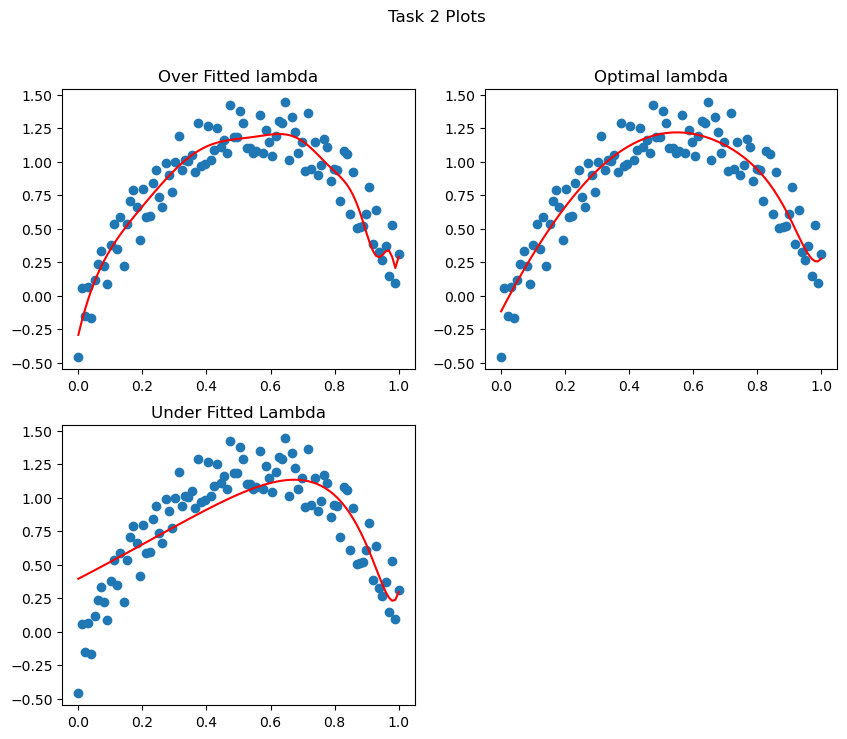

In [33]:
# Sort the data points and the corresponding predicted values for the overfit case
# overfit_x, overfit_y = sort_graph_data(overfit_weight[0], X_trans, X)
overfit_x, overfit_y = sort_graph_data(overfit_weight, X_trans, X)

# Sort the data points and the corresponding predicted values for the optimal fit case
# optimal_x, optimal_y = sort_graph_data(optimal_weight[1], X_trans, X)over_test_w
optimal_x, optimal_y = sort_graph_data(optimal_weight, X_trans, X)

# Sort the data points and the corresponding predicted values for the underfit case
underfit_x, underfit_y = sort_graph_data(underfit_weight, X_trans, X)

# Create a figure with 2 rows and 2 columns of subplots, with a size of 10x8 inches
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the overfit data in the first subplot
axs[0, 0].plot(overfit_x, overfit_y, c='r')
axs[0, 0].scatter(X, y)
axs[0, 0].set_title('Over Fitted lambda')

# Plot the optimal fit data in the second subplot
axs[0, 1].plot(optimal_x, optimal_y, c='r')
axs[0, 1].scatter(X, y)
axs[0, 1].set_title('Optimal lambda')

# Plot the underfit data in the third subplot
axs[1, 0].plot(underfit_x, underfit_y, c='r')
axs[1, 0].scatter(X, y)
axs[1, 0].set_title('Under Fitted Lambda')

# Hide the fourth subplot
axs[1, 1].axis('off')

# Add a title for the entire figure
fig.suptitle('Task 2 Plots')

# Show the plots
plt.show()

## Reflection

Tenfold cross validation is a method used to assess the effectiveness of a machine learning model. This involves dividing the dataset into ten equal subsets, using nine subsets to train the model and one to test it. The process is repeated ten times using a different subset for testing. The results are then averaged to provide a more reliable estimate of the model's performance.

The choice of k, the number of folds, can impact the results of k-fold cross-validation. A larger k value will result in more folds and a higher number of models being trained, which can increase the computational complexity and provide a more accurate estimate of model performance. A smaller k value can be computationally faster but may lead to higher variance in the estimated performance.

Ten is a typical value for the number of folds in k-fold cross-validation because it strikes a balance between the number of repetitions needed to get a reliable estimate of the model's performance and the size of each fold. With ten folds, the model is trained and evaluated ten times, so the performance estimate is more reliable than with fewer folds. At the same time, each fold has a reasonable size, so the model is trained on a substantial portion of the data, which reduces the risk of overfitting. However, the number of folds depends on the size of the dataset and the computational resources available, so it is not always the best choice. In some cases, using fewer or more folds might be more appropriate.


# RidgeCV and LassoCV

Here I utilize scikit-learn's RidgeCV and LassoCV to determine the optimal regularization for the transformed data, where features are elevated up to the 50th order. 

The resulting error and lambda (l) values obtained from RidgeCV and LassoCV are examined, and compared with previous results. The analysis involves assessing whether the observed outcomes align with expectations. Additionally, the weights obtained from RidgeCV are compared with those obtained from LassoCV, considering whether the observed differences align with anticipated results.


In [34]:
# Set variable for data ET2_Regression_Data.csv.
file_csv = "ET2_Regression_Data.csv"

# Load the data from the CSV file into a 2D NumPy array.
data = np.loadtxt(file_csv, delimiter=',')

# Extract the input data (first column) and target output data (second column)
# from the NumPy array and store them in separate arrays.
X = data[:, 0] # input data
y = data[:, 1] # target output data

100
(100,)
RidgeCV error:  0.805781444532884
LassoCV error:  0.8299943353292869


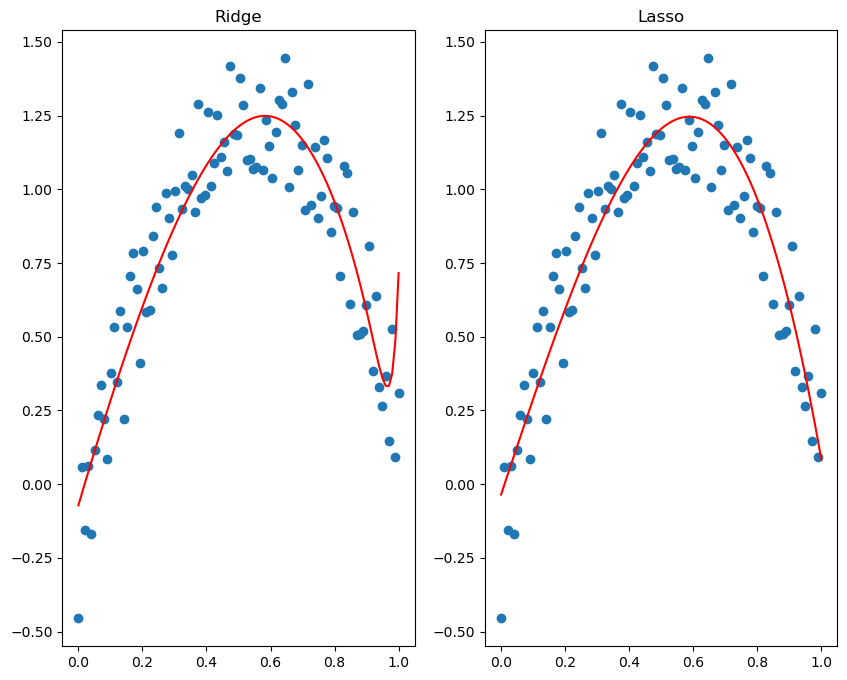

In [35]:
lambdas = np.linspace(0.001, 1, 1000)  # choose a suitable range of lambdas here

# Transform features up to 50th order
X_trans = transPoly(X, 50)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state=5)

# Initialize RidgeCV and LassoCV models
ridge = RidgeCV(alphas=lambdas)
lasso = LassoCV(alphas=lambdas)

# Fit the models to the training data
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Get weights for ridge and lasso models
ridge_weight = np.array(ridge.coef_)
lasso_weight = np.array(lasso.coef_)

# Get predicted y values for ridge and lasso
ridge_pred = ridge.predict(X_trans)
lasso_pred = lasso.predict(X_trans)

# Stack input data and predicted values horizontally
ridge_stacked_data = np.column_stack((X, ridge_pred))
lasso_stacked_data = np.column_stack((X, lasso_pred))

# Sort data by the first column (input values)
ridge_stacked_data = ridge_stacked_data[ridge_stacked_data[:,0].argsort()]
ridge_x = ridge_stacked_data[:,0]
ridge_y = ridge_stacked_data[:,1]

# Sort data by the first column (input values)
lasso_stacked_data = lasso_stacked_data[lasso_stacked_data[:,0].argsort()]
lasso_x = lasso_stacked_data[:,0]
lasso_y = lasso_stacked_data[:,1]

# Evaluate the models on the test data
ridge_score = ridge.score(X_test, y_test)
lasso_score = lasso.score(X_test, y_test)

print("RidgeCV error: ", ridge_score)
print("LassoCV error: ", lasso_score)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# Plot the ridge data in the first subplot
axs[0].plot(ridge_x, ridge_y, c='r')
axs[0].scatter(X, y)
axs[0].set_title('Ridge')

# Plot the lasso data in the first subplot
axs[1].plot(lasso_x, lasso_y, c='r')
axs[1].scatter(X, y)
axs[1].set_title('Lasso')

plt.show()

In [36]:
lasso_weight

array([ 3.26892961, -0.        , -3.14999164, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [37]:
ridge_weight 

array([ 3.69286729e+00, -1.32823482e+00, -1.38259682e+00, -7.65977586e-01,
       -3.04288571e-01, -4.99431928e-02,  6.69128028e-02,  1.07422376e-01,
        1.09313924e-01,  9.32936609e-02,  7.01131364e-02,  4.51979681e-02,
        2.12485566e-02, -4.05207289e-04, -1.91303289e-02, -3.46647908e-02,
       -4.69601568e-02, -5.61022507e-02, -6.22667085e-02, -6.56899756e-02,
       -6.66476405e-02, -6.54370333e-02, -6.23630509e-02, -5.77268572e-02,
       -5.18172493e-02, -4.49044441e-02, -3.72359792e-02, -2.90343813e-02,
       -2.04962495e-02, -1.17924245e-02, -3.06894799e-03,  5.55143355e-03,
        1.39674249e-02,  2.20971546e-02,  2.98760839e-02,  3.72549411e-02,
        4.41977397e-02,  5.06799217e-02,  5.66866500e-02,  6.22112597e-02,
        6.72538727e-02,  7.18201702e-02,  7.59203178e-02,  7.95680300e-02,
        8.27797649e-02,  8.55740354e-02,  8.79708250e-02,  8.99910962e-02,
        9.16563804e-02,  9.29884395e-02])

## Reflection

Ridge and Lasso are two popular regularization techniques used in linear regression to prevent overfitting and improve model performance. Ridge regression adds a penalty term to the sum of squared errors and shrinks the model's coefficients to zero. On the other hand, Lasso adds a penalty term proportional to the absolute value of the coefficients, which can result in some coefficients being set to zero, effectively performing feature selection.

The weights for Lasso and Ridge regression are pretty different. Lasso regression performs feature selection by shrinking some of the weights to zero, while Ridge regression tries to avoid overfitting by penalizing the magnitude of the weights. Looking at the weights, we can see Lasso has only three non-zero weights, while Ridge has non-zero weights for all features. This suggests that Lasso has identified only the most essential features, while Ridge has included all features in the model. Additionally, the magnitudes of the non-zero weights in Ridge are generally larger than those in Lasso, indicating that Ridge is placing more emphasis on some features than Lasso. Overall, the choice of Lasso or Ridge depends on the specific problem at hand, and it may be necessary to try both and compare their performance.
